## This is the 2-layer neural network workbook for ECE 239AS Assignment #3

Please follow the notebook linearly to implement a two layer neural network.

Please print out the workbook entirely when completed.

We thank Serena Yeung & Justin Johnson for permission to use code written for the CS 231n class (cs231n.stanford.edu).  These are the functions in the cs231n folders and code in the jupyer notebook to preprocess and show the images.  The classifiers used are based off of code prepared for CS 231n as well.

The goal of this workbook is to give you experience with training a two layer neural network.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass

In [2]:
from nndl.neural_net import TwoLayerNet

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [4]:
## Implement the forward pass of the neural network.

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.381231210991542e-08


### Forward pass loss

In [5]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.071696123862817

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.0


In [6]:
print(loss)

1.071696123862817


### Backward pass

Implements the backwards pass of the neural network.  Check your gradients with the gradient check utilities provided.

In [7]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.887723777584258e-10
b2 max relative error: 1.8392106647421603e-10
W1 max relative error: 4.820182284856054e-09
b1 max relative error: 1.7679551853461256e-09


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the softmax and SVM.

Final training loss:  0.014497864587765941


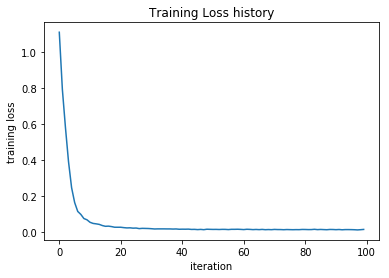

In [8]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [9]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 28-29%.

In [10]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

iteration 0 / 1000: loss 2.302757518613176
iteration 100 / 1000: loss 2.3021201592072362
iteration 200 / 1000: loss 2.2956136007408703
iteration 300 / 1000: loss 2.2518259043164135
iteration 400 / 1000: loss 2.1889952350467756
iteration 500 / 1000: loss 2.1162527791897743
iteration 600 / 1000: loss 2.0646708276982166
iteration 700 / 1000: loss 1.9901688623083942
iteration 800 / 1000: loss 2.002827640124685
iteration 900 / 1000: loss 1.9465176817856498
Validation accuracy:  0.283


## Questions:

The training accuracy isn't great.  

(1) What are some of the reasons why this is the case?  Take the following cell to do some analyses and then report your answers in the cell following the one below.

(2) How should you fix the problems you identified in (1)?


In [11]:
stats['train_acc_history']

[0.095, 0.15, 0.25, 0.25, 0.315]

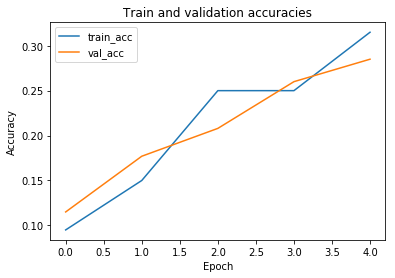

In [12]:
# ================================================================ #
# YOUR CODE HERE:
#   Do some debugging to gain some insight into why the optimization
#   isn't great.
# ================================================================ #

# Plot the loss function and train / validation accuracies

train, = plt.plot(stats['train_acc_history'], label='train')
val, = plt.plot(stats['val_acc_history'], label='val')
plt.title('Train and validation accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend([train, val], ["train_acc", "val_acc"])
plt.show()

pass
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Answers:

(1) During the initialization, the initialized weights are just small random numbers so that it is really bad initialization of weights. Moreover, bad choices of learning rate, learning rate decay, batch size, and regularization may also be the causes.

(2) To fix this problem, it is better to use grid search to see which combination of parameters will have better performance and accuracy.

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net.

In [13]:
best_net = None # store the best model into this 

# ================================================================ #
# YOUR CODE HERE:
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 50% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 28%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #
pass

best_val = -1
results = {}
np.random.seed(0)

batch_sizes = [200,  250]
lrs = [1e-4, 5e-4, 1e-3, 3e-3]
regs = [0.1, 0.25, 0.4]
lr_decays = [0.95, 0.98]

grid_search = [(x,y,z,h) for x in batch_sizes for y in lrs for z in regs for h in lr_decays]

for bs, lr, reg, lr_decay in grid_search:
    
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=2000, batch_size = bs,
                learning_rate=lr, learning_rate_decay=lr_decay,
                reg=reg, verbose=True)

    val_acc = (net.predict(X_val) == y_val).mean()
    print('Validation accuracy: ', val_acc)
    
    results[(bs,lr,reg, lr_decay)]=val_acc
    
    if val_acc > best_val:
        best_val = val_acc
        best_net = net
print('Best net: ', best_net)
print('Validation accuracy with the best net: ', best_val)
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
# best_net = net


iteration 0 / 2000: loss 2.3026638589680744
iteration 100 / 2000: loss 2.30210176404191
iteration 200 / 2000: loss 2.2951614369643
iteration 300 / 2000: loss 2.246201353536789
iteration 400 / 2000: loss 2.203403253501954
iteration 500 / 2000: loss 2.1279197745355067
iteration 600 / 2000: loss 2.1236087070062735
iteration 700 / 2000: loss 2.039737782235252
iteration 800 / 2000: loss 1.9839960033238633
iteration 900 / 2000: loss 1.9625411952174154
iteration 1000 / 2000: loss 2.027072849275479
iteration 1100 / 2000: loss 1.9446897828687655
iteration 1200 / 2000: loss 1.814473358697451
iteration 1300 / 2000: loss 1.8494241174592863
iteration 1400 / 2000: loss 1.9008318824491692
iteration 1500 / 2000: loss 1.8385190886698948
iteration 1600 / 2000: loss 1.8368841390423025
iteration 1700 / 2000: loss 1.8307050991237732
iteration 1800 / 2000: loss 1.8442892096222672
iteration 1900 / 2000: loss 1.8238398820814163
Validation accuracy:  0.355
iteration 0 / 2000: loss 2.3026600844489074
iteration 

iteration 1400 / 2000: loss 1.5112190131276753
iteration 1500 / 2000: loss 1.5051875093318325
iteration 1600 / 2000: loss 1.4979911324353385
iteration 1700 / 2000: loss 1.5673270745781456
iteration 1800 / 2000: loss 1.4951072005142616
iteration 1900 / 2000: loss 1.4972180407221214
Validation accuracy:  0.489
iteration 0 / 2000: loss 2.3027838447846376
iteration 100 / 2000: loss 2.0945838277084436
iteration 200 / 2000: loss 1.854833477485209
iteration 300 / 2000: loss 1.773948268025538
iteration 400 / 2000: loss 1.7138884030693393
iteration 500 / 2000: loss 1.6716139094385372
iteration 600 / 2000: loss 1.7953573075410378
iteration 700 / 2000: loss 1.7711836577668356
iteration 800 / 2000: loss 1.671932563540694
iteration 900 / 2000: loss 1.4812696380446881
iteration 1000 / 2000: loss 1.5890314090874185
iteration 1100 / 2000: loss 1.488347666923681
iteration 1200 / 2000: loss 1.6519744152578546
iteration 1300 / 2000: loss 1.5861491590151962
iteration 1400 / 2000: loss 1.4025543102412403
i

iteration 700 / 2000: loss 1.62260916946066
iteration 800 / 2000: loss 1.5769165076168439
iteration 900 / 2000: loss 1.613161088060471
iteration 1000 / 2000: loss 1.4532339946083455
iteration 1100 / 2000: loss 1.5861365842872348
iteration 1200 / 2000: loss 1.4786754731040146
iteration 1300 / 2000: loss 1.4387325330847758
iteration 1400 / 2000: loss 1.4788133468187756
iteration 1500 / 2000: loss 1.487106219471395
iteration 1600 / 2000: loss 1.3632401054642784
iteration 1700 / 2000: loss 1.388101410275256
iteration 1800 / 2000: loss 1.448713627094077
iteration 1900 / 2000: loss 1.3448360246739226
Validation accuracy:  0.478
iteration 0 / 2000: loss 2.3026680570839027
iteration 100 / 2000: loss 1.7945742721749296
iteration 200 / 2000: loss 1.832194272635748
iteration 300 / 2000: loss 1.6237403065423122
iteration 400 / 2000: loss 1.6542061182088947
iteration 500 / 2000: loss 1.5604536530675799
iteration 600 / 2000: loss 1.485547259311235
iteration 700 / 2000: loss 1.5672012665856778
iterat

Validation accuracy:  0.372
iteration 0 / 2000: loss 2.302799564943597
iteration 100 / 2000: loss 2.3023869823026293
iteration 200 / 2000: loss 2.297139420278263
iteration 300 / 2000: loss 2.264917011452694
iteration 400 / 2000: loss 2.209375864288572
iteration 500 / 2000: loss 2.177577122509616
iteration 600 / 2000: loss 2.125845495953006
iteration 700 / 2000: loss 2.034526606554556
iteration 800 / 2000: loss 2.076498454126965
iteration 900 / 2000: loss 2.0551660991486145
iteration 1000 / 2000: loss 1.9697511679015525
iteration 1100 / 2000: loss 1.9997651335057274
iteration 1200 / 2000: loss 1.8951595743131804
iteration 1300 / 2000: loss 1.8250813932297483
iteration 1400 / 2000: loss 1.8353035094007146
iteration 1500 / 2000: loss 1.8567584853557917
iteration 1600 / 2000: loss 1.863186742800982
iteration 1700 / 2000: loss 1.8900423884818434
iteration 1800 / 2000: loss 1.78332296158417
iteration 1900 / 2000: loss 1.8392051659932935
Validation accuracy:  0.358
iteration 0 / 2000: loss 2.

iteration 1300 / 2000: loss 1.596740768545239
iteration 1400 / 2000: loss 1.4918984063724798
iteration 1500 / 2000: loss 1.658078010371052
iteration 1600 / 2000: loss 1.4424523599695847
iteration 1700 / 2000: loss 1.5377960438476144
iteration 1800 / 2000: loss 1.5498063000567666
iteration 1900 / 2000: loss 1.4969536421776075
Validation accuracy:  0.471
iteration 0 / 2000: loss 2.302882410611367
iteration 100 / 2000: loss 2.1298170694370198
iteration 200 / 2000: loss 1.9444813432876888
iteration 300 / 2000: loss 1.794311564247586
iteration 400 / 2000: loss 1.7689859782878754
iteration 500 / 2000: loss 1.7207724684871948
iteration 600 / 2000: loss 1.602988160814055
iteration 700 / 2000: loss 1.6568825080601937
iteration 800 / 2000: loss 1.662393778817383
iteration 900 / 2000: loss 1.6531417344413968
iteration 1000 / 2000: loss 1.5892984417300078
iteration 1100 / 2000: loss 1.4455683446585406
iteration 1200 / 2000: loss 1.4460926847937803
iteration 1300 / 2000: loss 1.5519623019519833
ite

iteration 600 / 2000: loss 1.6480846795442703
iteration 700 / 2000: loss 1.7973246767876063
iteration 800 / 2000: loss 1.5527413114844268
iteration 900 / 2000: loss 1.4954074392719932
iteration 1000 / 2000: loss 1.622027793934723
iteration 1100 / 2000: loss 1.6157512321769893
iteration 1200 / 2000: loss 1.496859170751847
iteration 1300 / 2000: loss 1.475715351574424
iteration 1400 / 2000: loss 1.5379811480563763
iteration 1500 / 2000: loss 1.5691368758486426
iteration 1600 / 2000: loss 1.4186761560806418
iteration 1700 / 2000: loss 1.4550510688717604
iteration 1800 / 2000: loss 1.555444397931136
iteration 1900 / 2000: loss 1.6219125136940518
Validation accuracy:  0.434
iteration 0 / 2000: loss 2.3027851326198214
iteration 100 / 2000: loss 1.8327105363206666
iteration 200 / 2000: loss 1.7559888869736378
iteration 300 / 2000: loss 1.5162422399624997
iteration 400 / 2000: loss 1.5916544733450173
iteration 500 / 2000: loss 1.6100617160218427
iteration 600 / 2000: loss 1.6170515609516565
it

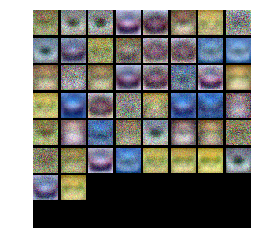

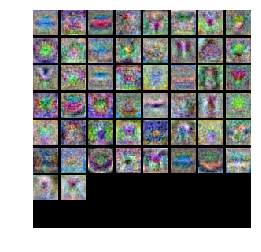

In [14]:
from cs231n.vis_utils import visualize_grid
# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

## Question:

(1) What differences do you see in the weights between the suboptimal net and the best net you arrived at?

## Answer:

(1) The best net's weights look more colorful, informative and distinct from each other, while suboptimal net's weights look noisy and monotonous.

## Evaluate on test set 

In [15]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.501
